<a href="https://colab.research.google.com/github/omaimajameel11/HunarIntern_task02/blob/main/HunarInternTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Evaluation:
Mean Squared Error: 180.19702521731978
R² Score: 0.39488087747723455


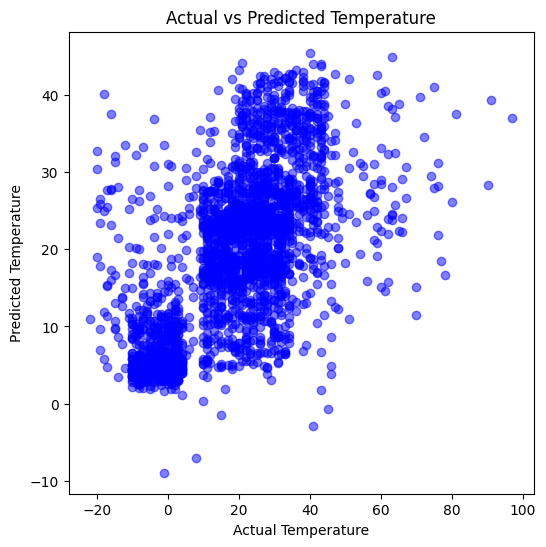


Example Prediction:
Input Features:
       Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  UV Index  \
4111        38         4.5                6.0               1021.19         9   

      Visibility (km)  Cloud Cover_cloudy  Cloud Cover_overcast  \
4111             10.0               False                 False   

      Cloud Cover_partly cloudy  Season_Spring  Season_Summer  Season_Winter  \
4111                      False          False          False          False   

      Location_inland  Location_mountain  
4111             True              False  
Predicted Temperature: 36.2135544715173


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load dataset
data = pd.read_csv("/content/weather_classification_data.csv")

# Step 2: Select features and target
X = data.drop(columns=['Temperature', 'Weather Type'])  # drop target and classification column
y = data['Temperature']

# Step 3: One-hot encode categorical columns
X = pd.get_dummies(X, columns=['Cloud Cover', 'Season', 'Location'], drop_first=True)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Step 8: Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

# Step 9: Example Prediction
sample = X_test.iloc[0:1]  # take first row of test data
pred_temp = model.predict(sample)
print("\nExample Prediction:")
print("Input Features:\n", sample)
print("Predicted Temperature:", pred_temp[0])
